# **Overview**

Using forex exchange rate historical data to analyze and predict fluctuations between the values of KES against USD

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

## **Dataset**

In [2]:
# Loading csv file into the dataframe
data = pd.read_csv('/kaggle/input/forex-exchange-rate-since-2004-updated-daily/daily_forex_rates.csv')

In [3]:
# Data overview
data.head(70)

,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,351.148510,2023-11-23
1,GHS,EUR,Ghanaian Cedi,13.084117,2023-11-23
2,HRK,EUR,Croatian Kuna,7.679006,2023-11-23
3,HNL,EUR,Honduran Lempira,26.943692,2023-11-23
4,HKD,EUR,Hong Kong Dollar,8.505384,2023-11-23
...,...,...,...,...,...
65,BTC,EUR,Bitcoin,0.000029,2023-11-23
66,CZK,EUR,Czech Republic Koruna,24.388824,2023-11-23
67,CVE,EUR,Cape Verdean Escudo,110.240709,2023-11-23
68,CUP,EUR,Cuban Peso,28.898905,2023-11-23


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321022 entries, 0 to 321021
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   currency       321022 non-null  object 
 1   base_currency  321022 non-null  object 
 2   currency_name  321022 non-null  object 
 3   exchange_rate  321022 non-null  float64
 4   date           321022 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.2+ MB


In [5]:
data.describe()

,exchange_rate
count,3.210220e+05
mean,3.874597e+03
std,9.379452e+04
min,2.876543e-05
25%,2.776225e+00
50%,1.713305e+01
75%,1.455157e+02
max,4.881841e+06


In [6]:
# Checking for null values
print(data.isnull().sum())

currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64


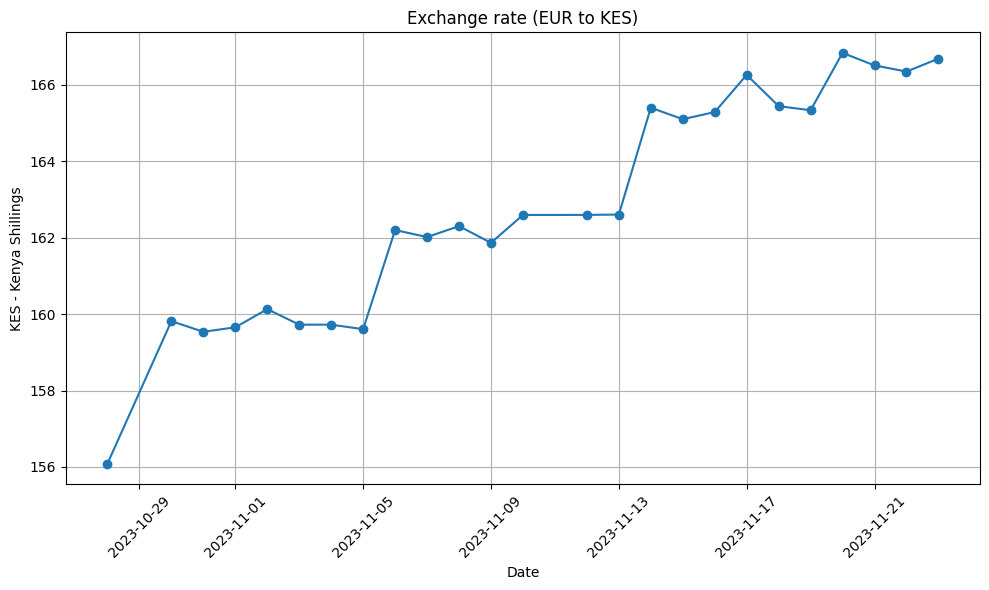

In [7]:
# Historical exchange rates between KES/EUR
my_currency_index = data['currency'] == 'KES'
data.loc[my_currency_index, 'date'] = pd.to_datetime(data.loc[my_currency_index, 'date'])
my_currency = data[my_currency_index]                                  
my_currency = my_currency.sort_values(by='date')


plt.figure(figsize=(10, 6))
plt.plot(my_currency['date'], my_currency['exchange_rate'], marker = 'o', linestyle = '-')
plt.xlabel("Date")
plt.ylabel("KES - Kenya Shillings")
plt.title("Exchange rate (EUR to KES)")                                                      
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()



In [8]:
# Overall performance analysis
rates = np.array(my_currency['exchange_rate'])
mean_rate = np.mean(rates)
max_rate = np.max(rates)
min_rate = np.min(rates)
stddev_rate = np.std(rates)


print(f"Mean: {mean_rate:.2f}")
print(f"Max: {max_rate:.2f}")
print(f"Min: {min_rate:.2f}")
print(f"Standard Deviation: {stddev_rate:2f}")



Mean: 162.79
Max: 166.84
Min: 156.09
Standard Deviation: 2.928355
